# Model of planetary motion
by Timothy Novak

In [1]:
# import functions from the modsim.py module
from modsim import *

The following code initializes the state and system objects for the earth sun system.

In [8]:
# State
#distance in meteres velocity in m/s
st8 = State(xpos = 149597900000, ypos = 0, xvel = 0, yvel = 29000)
#System
#G = m^3/(kg*s^2) masses are in kg masses are in kg radi are in meteres velocities are in m/s
sys = System(init = st8,G = 6.67408*10**(-11), M_earth = 5.972*10**24, M_sun =1.989*10**30, R_earth = 6.3781*10**6, R_sun= 6.95700*10**8, t_end = 365.25*24*60*60*5, sun_pos = Vector(0,0), shot_vel = 100000, M_shot = 100000000000000000000000)


The following code describes the functions which constitute the model

In [9]:
#model constituant functions
def get_force(G,M,m,planet_vector, sun_vector):
    """Applies law of universal gravitation and returns the force of gravity as a vector towards the center of the circle in N"""
    #calculates the vector pointing from the planet to the sun
    planet_to_sun_vector = sun_vector-planet_vector
    #takes the direction of the previous vector
    Direction_vector = planet_to_sun_vector/planet_to_sun_vector.mag
    #calculates the acceleration of the planet
    acceleration_mag = (G*M*m)/(planet_vector.mag**2)
    #returns a vector which has the magnitude of the acceleration and a direction towards the star
    return Direction_vector * acceleration_mag

def get_grav_acceleration(G,M,m,planet_vector,sun_vector):
    """Calculates acceleration with F = ma
    F in N
    m in kg
    a in m/s^2"""
    #gets the force and divides by the orbiting body to get the acceleration of the orbing body
    return get_force(G,M,m,planet_vector,sun_vector)/m

def fire_cannon(xpos,ypos,xvel,yvel,t, system):
    if t >= 365*24*60*60 and t <= 366*24*60*60:
        planet_vector = Vector(xpos, ypos)
        planet_vel_vector = Vector(xvel, yvel)

        vel_vector_mag = ((system.M_earth*planet_vel_vector.mag - system.M_shot*system.shot_vel)/(system.M_earth-system.M_shot))- planet_vel_vector.mag
        print(vel_vector_mag)
        planet_vel_vector = planet_vel_vector/planet_vel_vector.mag*vel_vector_mag
        return planet_vel_vector
    else:
        return Vector(0,0)
    
def planet_slope_func(st8,t,sys):
    """Describes the change in position and velocity in both the x and y plane between every time step.
    The function takes in a state which describes the old position of the system
    t is the time of the syatem, it is not actually used in calculations however it is a required argument for use with an ODE Solver
    sys is a system object which contains system constants"""
    
    #extracts the values from the state because the ODE solver does not store variables in a state object
    xpos,ypos,xvel,yvel= st8
    #creates a vector which describes the position of the planet
    planet_pos = Vector(xpos,ypos)
    
    #describes a system of differential equations which explain the changes in the system
    #update the velocity in each direction
    dxveldt = get_grav_acceleration(sys.G, sys.M_sun, sys.M_earth, planet_pos,sys.sun_pos).x + fire_cannon(xpos,ypos,xvel,yvel,t,sys).x
    dyveldt = get_grav_acceleration(sys.G, sys.M_sun, sys.M_earth, planet_pos,sys.sun_pos).y + fire_cannon(xpos,ypos,xvel,yvel,t,sys).y
    
    #update the position in each direction
    dxposdt = xvel
    dyposdt = yvel
    
    #returns the change in the state variables
    return dxposdt,dyposdt,dxveldt,dyveldt


The following code runs the simulation and plots the results

-1206.2111016149101 dimensionless
-1206.2111016149101 dimensionless
514924.09998741746 dimensionless
514924.09998741746 dimensionless
207734005.76127625 dimensionless
207734005.76127625 dimensionless
40272001879.45215 dimensionless
40272001879.45215 dimensionless
-1206.2926028776346 dimensionless
-1206.2926028776346 dimensionless
397158.7310855612 dimensionless
397158.7310855612 dimensionless
2071150055.779419 dimensionless
2071150055.779419 dimensionless
880512662986.2969 dimensionless
880512662986.2969 dimensionless
355234553216524.0 dimensionless
355234553216524.0 dimensionless
6.886694368701542e+16 dimensionless
6.886694368701542e+16 dimensionless
-1206.3002430755623 dimensionless
-1206.3002430755623 dimensionless
95893.90826348029 dimensionless
95893.90826348029 dimensionless
3808638.8037936687 dimensionless
3808638.8037936687 dimensionless
-1206.261939181226 dimensionless
-1206.261939181226 dimensionless
205254.56379810348 dimensionless
205254.56379810348 dimensionless
33239071.8

-1643.0989273091213 dimensionless
-1643.0989273091213 dimensionless
-1687.9412781393612 dimensionless
-1687.9412781393612 dimensionless
-1484.4197828531778 dimensionless
-1484.4197828531778 dimensionless
-1181.4886981829222 dimensionless
-1181.4886981829222 dimensionless
-1402.0545219811993 dimensionless
-1402.0545219811993 dimensionless
-1596.5581242884155 dimensionless
-1596.5581242884155 dimensionless
-1590.1316189664303 dimensionless
-1590.1316189664303 dimensionless
-1604.3799161774423 dimensionless
-1604.3799161774423 dimensionless
-1676.3912999351976 dimensionless
-1676.3912999351976 dimensionless
-1689.6729937518676 dimensionless
-1689.6729937518676 dimensionless
-1699.7952415409552 dimensionless
-1699.7952415409552 dimensionless
-1666.8583634681759 dimensionless
-1666.8583634681759 dimensionless
-1573.5022686327238 dimensionless
-1573.5022686327238 dimensionless
-1578.9785845944125 dimensionless
-1578.9785845944125 dimensionless
-1606.4634813491798 dimensionless
-1606.46348134

-1702.947459764787 dimensionless
-1702.947459764787 dimensionless
-1702.8563505394304 dimensionless
-1702.8563505394304 dimensionless
-1702.9216099922746 dimensionless
-1702.9216099922746 dimensionless
-1702.949359570598 dimensionless
-1702.949359570598 dimensionless
-1702.9483002848972 dimensionless
-1702.9483002848972 dimensionless
-1702.9532571790328 dimensionless
-1702.9532571790328 dimensionless
-1702.978041721857 dimensionless
-1702.978041721857 dimensionless
-1702.9824479005724 dimensionless
-1702.9824479005724 dimensionless
-1702.9879556399894 dimensionless
-1702.9879556399894 dimensionless
-1702.9879556399803 dimensionless
-1702.9879556399803 dimensionless
-1702.9621901576716 dimensionless
-1702.9621901576716 dimensionless
-1702.9546529291258 dimensionless
-1702.9546529291258 dimensionless
-1701.171232017421 dimensionless
-1701.171232017421 dimensionless
-1697.531191302473 dimensionless
-1697.531191302473 dimensionless
-1698.0100810589404 dimensionless
-1698.0100810589404 dime

-1702.9972574076419 dimensionless
-1702.9972574076419 dimensionless
-1702.9967846778452 dimensionless
-1702.9967846778452 dimensionless
-1702.9957944786333 dimensionless
-1702.9957944786333 dimensionless
-1702.9959247320835 dimensionless
-1702.9959247320835 dimensionless
-1702.9972713446098 dimensionless
-1702.9972713446098 dimensionless
-1702.9972711126259 dimensionless
-1702.9972711126259 dimensionless
-1702.9972734355044 dimensionless
-1702.9972734355044 dimensionless
-1702.9972653588234 dimensionless
-1702.9972653588234 dimensionless
-1702.9972497837482 dimensionless
-1702.9972497837482 dimensionless
-1702.9972609396773 dimensionless
-1702.9972609396773 dimensionless
-1702.9972683429232 dimensionless
-1702.9972683429232 dimensionless
-1702.9972686276867 dimensionless
-1702.9972686276867 dimensionless
-1702.9972697080952 dimensionless
-1702.9972697080952 dimensionless
-1702.9972751101377 dimensionless
-1702.9972751101377 dimensionless
-1702.9972743382184 dimensionless
-1702.99727433

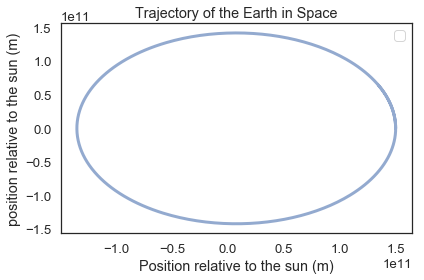

In [10]:
#runs an ODE solver to run a simulation and restricts the ODE solver to taking steps with a maximum size of one day
results,details = run_ode_solver(sys,planet_slope_func, max_step=60*60*24)

#plots the results
plot(results.xpos,results.ypos)
decorate(title = "Trajectory of the Earth in Space", xlabel = "Position relative to the sun (m)", ylabel = "position relative to the sun (m)")


The following code wraps the code up in a run simulation function so that it can be swept across parameters.

In [5]:
def run_orbit_simulation (shot_vel_param,M_shot_param,num_years):
    # State
    #distance in meteres velocity in m/s
    st8 = State(xpos = 149597900000, ypos = 0, xvel = 0, yvel = 29000)
    #System
    #G = m^3/(kg*s^2) masses are in kg masses are in kg radi are in meteres velocities are in m/s
    sys = System(init = st8,G = 6.67408*10**(-11), M_earth = 5.972*10**24, M_sun =1.989*10**30, R_earth = 6.3781*10**6, R_sun= 6.95700*10**8, t_end = 365.25*24*60*60*num_years, sun_pos = Vector(0,0), shot_vel = shot_vel_param, M_shot = M_shot_param)
    
    #runs an ODE solver to run a simulation and restricts the ODE solver to taking steps with a maximum size of one day
    results,details = run_ode_solver(sys,planet_slope_func, max_step=60*60*24)
    return results